In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Courses_T1 2019.xlsx')
df.head()

,Unnamed: 0,Course Code,Title,Field,Level,Pre-requisites,Professor,ECTS,Language,Remarks,TIME
0,0,GESTS409,Advanced accounting,Accounting,Specialization,At least two courses in accounting,Jean-Paul LOOZEN,5.0,English,NaN,"[('Wednesday', '12:00 to 14:00'), ('Wednesday'..."
1,1,GESTS410,Advanced corporate finance,Finance,Intermediate,"Accounting, basic finance course",Kim OOSTERLINCK,5.0,English,NaN,"[('Wednesday', '16:00 to 18:00'), ('Wednesday'..."
2,2,GESTS402,Advanced finance,Finance,Intermediate,At least one class in finance,Laurent GHEERAERT,5.0,English,Description available on demand,"[('Tuesday', '10:00 to 12:00'), ('Tuesday', '1..."
3,3,GESTS403,Advanced Marketing,Marketing,Intermediate,Basic marketing class,Sandra ROTHENBERGER,5.0,English,NaN,"[('Monday', '10:00 to 12:00'), ('Monday', '10:..."
4,4,GESTS489,Advanced Marketing,Marketing,Intermediate,Basic knowledge in marketing,Sandra ROTHENBERGER,5.0,English,NaN,"[('Monday', '10:00 to 12:00'), ('Monday', '18:..."


In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
titles = df.Title

In [5]:
df.replace('Finance ', 'Finance', inplace=True)
df.replace('European Economy', 'European Economics', inplace=True)

In [6]:
#Classifying Fields
Field_Accounting = df[df.Field == 'Accounting']
Field_Finance = df[df.Field == 'Finance']
Field_Entrepreneurship_and_Innovation = df[df.Field == 'Entrepreneurship and Innovation']
Field_Statistics = df[df.Field == 'Statistics']
Field_Marketing = df[df.Field == 'Marketing']
Field_Strategy = df[df.Field == 'Strategy']
Field_Mathematics = df[df.Field == 'Mathematics']
Field_IT = df[df.Field == 'IT']
Field_Microeconomics = df[df.Field == 'Microeconomics']
Field_Supply_Chain = df[df.Field == 'Supply Chain']
Field_Industrial_Economics = df[df.Field == 'Industrial Economics']
Field_Econometrics = df[df.Field == 'Econometrics']
Field_Public_Economics = df[df.Field == 'Public Economics']
Field_Law = df[df.Field == 'Law']
Field_Management = df[df.Field == 'Management']
Field_International_Economics = df[df.Field == 'International Economics']
Field_European_Economics = df[df.Field == 'European Economics']

In [7]:
df = df.rename(columns = {'Level (This is not an assesment of the difficulty of the course, but its positioning in the learning program)':'Level'})

In [8]:
#Classifying Levels
Level_Introduction = df[df.Level == 'Introduction']
Level_Intermediate = df[df.Level == 'Intermediate']
Level_Specialization = df[df.Level == 'Specialization']
Level_nan = df[df.Level.isnull()]

In [9]:
#Classifying ECTSs
ECTS_5 = df[df.ECTS == 5.0]
ECTS_not5 = df[df.ECTS != 5.0]

In [10]:
#Clssifying Languages
Lang_Eng = df[df.Language == 'English']
Lang_Fr = df[df.Language == 'French']
Lang_unknow = df[df.Language == '?']

In [11]:
df.replace('08:00', '8:00', inplace=True)

In [12]:
df.replace('09:00', '9:00', inplace=True)

In [13]:
#Timetable Create
l_time = ['8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00']
l_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

TimeTabel = pd.DataFrame(index = l_time, columns = l_week)
TimeTabel.to_excel('Courses_TimeTable.xlsx')
TimeTabel = TimeTabel.fillna('')

In [14]:
WEEK = []
TIME = []
COURSE = []
for i in range(31):
    temp_time = df.TIME[i]
    temp_course = df['Course Code'][i]
 
    #modifying format
    temp_time = temp_time.replace('[', '')
    temp_time = temp_time.replace(']', '')
    temp_time = temp_time.replace(',', ':')
    temp_time = temp_time.replace(': (', ',')
    temp_time = temp_time.replace('(', '')
    temp_time = temp_time.replace(')', '')
    temp_time = temp_time.split(',')
    
    if len(temp_time) == 1:
         temp_time[0] = temp_time[0].split(': ')
    elif len(temp_time) == 2:
        for two in range(2):
            temp_time[two] = temp_time[two].split(': ')
    elif len(temp_time) == 3:
        for three in range(3):
            temp_time[three] = temp_time[three].split(': ')
    elif len(temp_time) == 4:
        for four in range(4):
            temp_time[four] = temp_time[four].split(': ')
    elif len(temp_time) == 5:
        for five in range(5):
            temp_time[five] = temp_time[five].split(': ')
    elif len(temp_time) == 6:
        for six in range(6):
            temp_time[six] = temp_time[six].split(': ')
   
    
    for a in range(len(temp_time)):
        time_week = temp_time[a][0]
        time_time = temp_time[a][1]
        WEEK.append(time_week)
        TIME.append(time_time)
        
        if a <= len(temp_time):
            COURSE.append(temp_course)
            a = a + 1

for c in range(79):
    WEEK[c] = WEEK[c].strip(WEEK[c][0])
    TIME[c] = TIME[c].strip(TIME[c][0])
    
    #Identifying how many classes and adding into the fields
    S = TIME[c].split(' ')
    s0 = int(S[0].strip(':00'))
    s2 = int(S[2].strip(':00'))
    if (s2 - s0) == 1:
        TimeTabel[WEEK[c]][S[0]] = TimeTabel[WEEK[c]][S[0]] + ', ' + COURSE[c]
    if (s2 - s0) == 2:
        TimeTabel[WEEK[c]][S[2]] = TimeTabel[WEEK[c]][S[2]] + ', ' + COURSE[c]
        TimeTabel[WEEK[c]][str(s0+1) + ':00'] = TimeTabel[WEEK[c]][str(s0+1) + ':00'] + ', ' + COURSE[c]
    if (s2 - s0) == 3:
        TimeTabel[WEEK[c]][S[2]] = TimeTabel[WEEK[c]][S[2]] + ',' +  COURSE[c]
        TimeTabel[WEEK[c]][str(s0+1) + ':00'] = TimeTabel[WEEK[c]][str(s0+1) + ':00'] + ', ' +  COURSE[c]
        TimeTabel[WEEK[c]][str(s0+2) + ':00'] = TimeTabel[WEEK[c]][str(s0+2) + ':00'] + ', ' +  COURSE[c]
    if (s2 - s0) == 4:
        TimeTabel[WEEK[c]][S[2]] = TimeTabel[WEEK[c]][S[2]] + COURSE[c]
        TimeTabel[WEEK[c]][str(s0+1) + ':00'] = TimeTabel[WEEK[c]][str(s0+1) + ':00'] + ', ' +  COURSE[c]
        TimeTabel[WEEK[c]][str(s0+2) + ':00'] = TimeTabel[WEEK[c]][str(s0+2) + ':00'] + ', ' +  COURSE[c]
        TimeTabel[WEEK[c]][str(s0+3) + ':00'] = TimeTabel[WEEK[c]][str(s0+3) + ':00'] + ', ' +  COURSE[c]

#Striping repeated subjects        
for i in l_week:
    for s in l_time:        
        TimeTabel[i][s] = np.unique(TimeTabel[i][s].strip(', ').split(', '))
        if TimeTabel[i][s].dtype == '<U1':
            TimeTabel[i][s] = '0'
                
TimeTabel

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
8:00,0,0,0,0,0,0,0
9:00,0,0,0,[GESTS482],0,0,0
10:00,0,0,0,[GESTS482],0,"[GESTS551, STATS401]",0
11:00,0,0,0,[GESTS482],0,"[GESTS551, STATS401]",0
12:00,0,[POLIS428],0,[GESTS482GESTS482],0,"[STATS401,GESTS551,GESTS551]",0
13:00,[GESTS408],"[ECONS463, GESTS401, GESTS402, GESTS403, MATHS...","[ECONO405, GESTS409]",[GESTS409],"[ECONO405, GESTS406]",0,0
14:00,[GESTS408],"[ECONS463, ECONS463,POLIS428,POLIS428, GESTS40...","[ECONO405, GESTS409]",[GESTS409],"[ECONO405, GESTS406, MATHS400]",0,0
15:00,"[GESTS404, GESTS482, GESTS567]","[GESTS401, GESTS414, GESTS448, GESTS468]","[ECONS412, GESTS409]",0,"[ECONS441, GESTS414, MATHS400]",0,0
16:00,"[GESTS404, GESTS482, GESTS567]","[GESTS401, GESTS414, GESTS448, GESTS468]","[ECONS412, GESTS409]",0,"[ECONS441, GESTS414,MATHS400]",0,0
17:00,"[GESTS404, GESTS406, GESTS567]","[ECONS462,GESTS468,GESTS468, GESTS401, GESTS40...","[ECONO405, GESTS410]",[ECONS453],"[ECONS418, GESTS430]",0,0


In [15]:
#formate modifying
TimeTabel['Monday']['18:00'] = np.array(['GESTS406', 'GESTS404', 'GESTS567'])
TimeTabel['Tuesday']['14:00'] = np.array(['ECONS463', 'POLIS428', 'GESTS401', 'GESTS402', 'GESTS403', 'GESTS414', 'MATHS400'])
TimeTabel['Tuesday']['17:00'] = np.array(['ECONS462', 'GESTS468', 'GESTS401', 'GESTS404', 'GESTS414'])
TimeTabel['Thursday']['12:00'] = np.array(['GESTS482'])
TimeTabel['Saturday']['12:00'] = np.array(['STATS401', 'GESTS551'])

In [16]:
#week list
#monday list
MONDAY = []
for cour in TimeTabel['Monday']:
    for l in range(len(cour)):
        MONDAY.append(cour[l])
MONDAY = list(np.unique(MONDAY))
MONDAY.remove('0')

#tuesday list
TUESDAY = []
for cour in TimeTabel['Tuesday']:
    for l in range(len(cour)):
        TUESDAY.append(cour[l])
TUESDAY = list(np.unique(TUESDAY))
TUESDAY.remove('0')

#wednesday list
WEDNESDAY = []
for cour in TimeTabel['Wednesday']:
    for l in range(len(cour)):
        WEDNESDAY.append(cour[l])
WEDNESDAY = list(np.unique(WEDNESDAY))
WEDNESDAY.remove('0')

#thursday list
THURSDAY = []
for cour in TimeTabel['Thursday']:
    for l in range(len(cour)):
        THURSDAY.append(cour[l])
THURSDAY = list(np.unique(THURSDAY))
THURSDAY.remove('0')

#friday list
FRIDAY = []
for cour in TimeTabel['Friday']:
    for l in range(len(cour)):
        FRIDAY.append(cour[l])
FRIDAY = list(np.unique(FRIDAY))
FRIDAY.remove('0')

#saturday list
SATURDAY = []
for cour in TimeTabel['Saturday']:
    for l in range(len(cour)):
        SATURDAY.append(cour[l])
SATURDAY = list(np.unique(SATURDAY))
SATURDAY.remove('0')

#classifying times (week)
TIME_Monday = pd.DataFrame()
for mon in MONDAY:
    TIME_Monday = TIME_Monday.append(df[df['Course Code'] == mon])
    
TIME_Tuesday = pd.DataFrame()
for tue in TUESDAY:
    TIME_Tuesday = TIME_Tuesday.append(df[df['Course Code'] == tue])
    
TIME_Wednesday = pd.DataFrame()
for wed in WEDNESDAY:
    TIME_Wednesday = TIME_Wednesday.append( df[df['Course Code'] == wed])
    
TIME_Thursday = pd.DataFrame()
for thu in THURSDAY:
    TIME_Thursday = TIME_Thursday.append(df[df['Course Code'] == thu])
    
TIME_Friday = pd.DataFrame()
for fri in FRIDAY:
    TIME_Friday = TIME_Friday.append(df[df['Course Code'] == fri])

TIME_Saturday = pd.DataFrame()
for sat in SATURDAY:
    TIME_Saturday = TIME_Saturday.append(df[df['Course Code'] == sat])
    
#8:00 list
t8 = []
for cour in TimeTabel.loc['8:00', :]:
    for l in range(len(cour)):
        t8.append(cour[l])
t8 = list(np.unique(t8))
t8.remove('0')

#9:00 list
t9 = []
for cour in TimeTabel.loc['9:00', :]:
    for l in range(len(cour)):
        t9.append(cour[l])
t9 = list(np.unique(t9))
t9.remove('0')

#10:00 list
t10 = []
for cour in TimeTabel.loc['10:00', :]:
    for l in range(len(cour)):
        t10.append(cour[l])
t10 = list(np.unique(t10))
t10.remove('0')

#11:00 list
t11 = []
for cour in TimeTabel.loc['11:00', :]:
    for l in range(len(cour)):
        t11.append(cour[l])
t11 = list(np.unique(t11))
t11.remove('0')

#12:00 list
t12 = []
for cour in TimeTabel.loc['12:00', :]:
    for l in range(len(cour)):
        t12.append(cour[l])
t12 = list(np.unique(t12))
t12.remove('0')

#13:00 list
t13 = []
for cour in TimeTabel.loc['13:00', :]:
    for l in range(len(cour)):
        t13.append(cour[l])
t13 = list(np.unique(t13))
t13.remove('0')

#14:00 list
t14 = []
for cour in TimeTabel.loc['14:00', :]:
    for l in range(len(cour)):
        t14.append(cour[l])
t14 = list(np.unique(t14))
t14.remove('0')

#15:00 list
t15 = []
for cour in TimeTabel.loc['15:00', :]:
    for l in range(len(cour)):
        t15.append(cour[l])
t15 = list(np.unique(t15))
t15.remove('0')

#16:00 list
t16 = []
for cour in TimeTabel.loc['16:00', :]:
    for l in range(len(cour)):
        t16.append(cour[l])
t16 = list(np.unique(t16))
t16.remove('0')

#17:00 list
t17 = []
for cour in TimeTabel.loc['17:00', :]:
    for l in range(len(cour)):
        t17.append(cour[l])
t17 = list(np.unique(t17))
t17.remove('0')

#18:00 list
t18 = []
for cour in TimeTabel.loc['18:00', :]:
    for l in range(len(cour)):
        t18.append(cour[l])
t18 = list(np.unique(t18))
t18.remove('0')

#19:00 list
t19 = []
for cour in TimeTabel.loc['19:00', :]:
    for l in range(len(cour)):
        t19.append(cour[l])
t19 = list(np.unique(t19))
t19.remove('0')

#20:00 list
t20 = []
for cour in TimeTabel.loc['20:00', :]:
    for l in range(len(cour)):
        t20.append(cour[l])
t20 = list(np.unique(t20))
t20.remove('0')

#21:00 list
t21 = []
for cour in TimeTabel.loc['21:00', :]:
    for l in range(len(cour)):
        t21.append(cour[l])
t21 = list(np.unique(t21))
t21.remove('0')

#22:00 list
t22 = []
for cour in TimeTabel.loc['22:00', :]:
    for l in range(len(cour)):
        t22.append(cour[l])
t22 = list(np.unique(t22))
t22.remove('0')

#classifying times (time)
TIME_8 = pd.DataFrame()
for course in t8:
    TIME_8 = TIME_8.append(df[df['Course Code'] == course])
    
TIME_9 = pd.DataFrame()
for course in t9:
    TIME_9 = TIME_9.append(df[df['Course Code'] == course])
    
TIME_10 = pd.DataFrame()
for course in t10:
    TIME_10 = TIME_10.append(df[df['Course Code'] == course])
    
TIME_11 = pd.DataFrame()
for course in t11:
    TIME_11 = TIME_11.append(df[df['Course Code'] == course])

TIME_12 = pd.DataFrame()
for course in t12:
    TIME_12 = TIME_12.append(df[df['Course Code'] == course])

TIME_13 = pd.DataFrame()
for course in t13:
    TIME_13 = TIME_13.append(df[df['Course Code'] == course])
    
TIME_14 = pd.DataFrame()
for course in t14:
    TIME_14 = TIME_14.append(df[df['Course Code'] == course])
    
TIME_15 = pd.DataFrame()
for course in t15:
    TIME_15 = TIME_15.append(df[df['Course Code'] == course])
    
TIME_16 = pd.DataFrame()
for course in t16:
    TIME_16 = TIME_16.append(df[df['Course Code'] == course])
    
TIME_17 = pd.DataFrame()
for course in t17:
    TIME_17 = TIME_17.append(df[df['Course Code'] == course])
    
TIME_18 = pd.DataFrame()
for course in t18:
    TIME_18 = TIME_18.append(df[df['Course Code'] == course])
    
TIME_19 = pd.DataFrame()
for course in t19:
    TIME_19 = TIME_19.append(df[df['Course Code'] == course])
    
TIME_20 = pd.DataFrame()
for course in t20:
    TIME_20 = TIME_20.append(df[df['Course Code'] == course])
    
TIME_21 = pd.DataFrame()
for course in t21:
    TIME_21 = TIME_21.append(df[df['Course Code'] == course])
    
TIME_22 = pd.DataFrame()
for course in t22:
    TIME_22 = TIME_22.append(df[df['Course Code'] == course])

In [17]:
TimeTabel.to_excel('Courses_TimeTable.xlsx')

In [18]:
#locating courses
def find_when(code):
    x = []
    y = []
    for i in range(TimeTabel.shape[0]):
        for c in range(TimeTabel.shape[1]):
            for num in range(len(TimeTabel.iat[i, c])):
                if TimeTabel.iat[i, c][num] == code:                    
                    i = int(i)
                    c = int(c)
                    x.append(c)
                    y.append(i + 8)
    Z = list(zip(x, y))
    return(Z)

In [28]:
def CourseSelect():
    CL = []
    Selections = 'GESTS404 GESTS401 ECONS455'
    Selections = Selections.split(' ')
    for cou in Selections:
        CL = CL + find_when(cou)
    return(CL)

In [31]:
def CourseSelect(Selections):
    CL = []
    Selections = Selections.split(' ')
    for cou in Selections:
        CL = CL + find_when(cou)
    return(CL)

In [35]:
CourseSelect('GESTS404 GESTS401 ECONS455')

[(0, 15),
 (0, 16),
 (0, 17),
 (1, 17),
 (0, 18),
 (1, 18),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (2, 19),
 (2, 20),
 (2, 21)]

>>GESTS404 GESTS401 ECONS455
YOU CHOOSED:
GESTS404
GESTS401
ECONS455


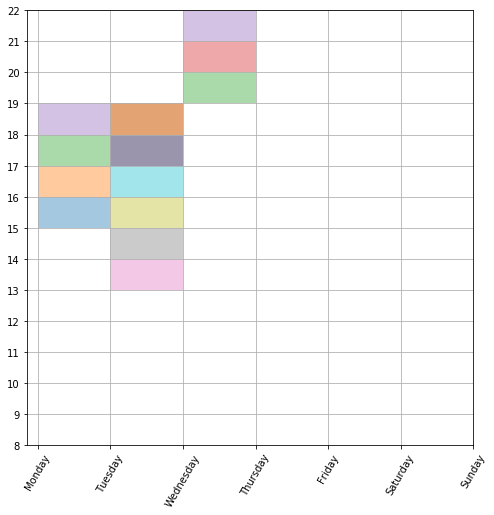

In [39]:
#Multi-Selection
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time = list(range(8, 23))


fig, ax = plt.subplots(figsize = (8, 8))
x1 = np.linspace(0, 1, 100)    
x2 = np.linspace(1, 2, 100)
x3 = np.linspace(2, 3, 100)
x4 = np.linspace(3, 4, 100)
x5 = np.linspace(4, 5, 100)
x6 = np.linspace(5, 6, 100)
x7 = np.linspace(6, 7, 100)

Selections=input('>>')

for i in CourseSelect(Selections):
    if i[0] == 0:
        plt.fill_between(x1, i[1], i[1]+1, alpha = 0.4)
    if i[0] == 1:
        plt.fill_between(x2, i[1], i[1]+1, alpha = 0.4)
    if i[0] == 2:
        plt.fill_between(x3, i[1], i[1]+1, alpha = 0.4)
    if i[0] == 3:
        plt.fill_between(x4, i[1], i[1]+1, alpha = 0.4)
    if i[0] == 4:
        plt.fill_between(x5, i[1], i[1]+1, alpha = 0.4)
    if i[0] == 5:
        plt.fill_between(x6, i[1], i[1]+1, alpha = 0.4)
    if i[0] == 6:
        plt.fill_between(x7, i[1], i[1]+1, alpha = 0.4)
    

plt.xticks(range(len(week)), week, rotation=60)
plt.yticks(range(8, 23))
plt.ylim([8, 22])
plt.grid()

print('YOU CHOOSED:')
for codes in Selections.split(' '):
    print(codes)

In [21]:
#random color function
import random

def random_color():
    Pallet = ['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color = ''
    for six in range(6):
        color += Pallet[random.randint(0, 14)]
    return('#' + color)
random_color()

'#4AEC29'

>>GESTS409
YOU CHOOSED:
GESTS409 -> Advanced accounting (description)



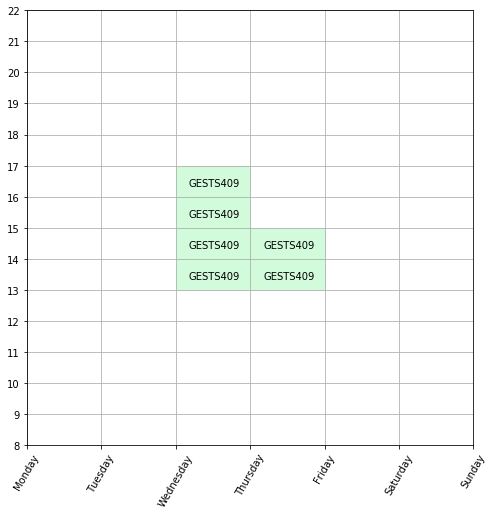

In [40]:
#Single-Selection
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time = list(range(8, 23))

CourseCode = input('>>')

fig, ax = plt.subplots(figsize = (8, 8))
x1 = np.linspace(0, 1, 100)    
x2 = np.linspace(1, 2, 100)
x3 = np.linspace(2, 3, 100)
x4 = np.linspace(3, 4, 100)
x5 = np.linspace(4, 5, 100)
x6 = np.linspace(5, 6, 100)
x7 = np.linspace(6, 7, 100)

color = random_color()
for i in find_when(CourseCode):
    if i[0] == 0:
        plt.fill_between(x1, i[1], i[1]+1, alpha = 0.4, color = color)
    if i[0] == 1:
        plt.fill_between(x2, i[1], i[1]+1, alpha = 0.4, color = color)
    if i[0] == 2:
        plt.fill_between(x3, i[1], i[1]+1, alpha = 0.4, color = color)
    if i[0] == 3:
        plt.fill_between(x4, i[1], i[1]+1, alpha = 0.4, color = color)
    if i[0] == 4:
        plt.fill_between(x5, i[1], i[1]+1, alpha = 0.4, color = color)
    if i[0] == 5:
        plt.fill_between(x6, i[1], i[1]+1, alpha = 0.4, color = color)
    if i[0] == 6:
        plt.fill_between(x7, i[1], i[1]+1, alpha = 0.4, color = color)
    
    plt.text(i[0] + 0.175, i[1] + 0.35, CourseCode, fontsize=10)
        

plt.xticks(range(len(week)), week, rotation=60)
plt.yticks(range(8, 23))
plt.ylim([8, 22])
plt.grid()

print('YOU CHOOSED:')
print(list(df[df['Course Code'] == CourseCode]['Course Code'])[0] + ' -> ' + list(df[df['Course Code'] == CourseCode]['Title'])[0] + ' (description)\n')